# Classify particles using Principal Component Analysis

Classify particles into gamma(signal) or hadrons(background)

The data set was generated by a Monte Carlo program, Corsika, described in D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers, Forschungszentrum Karlsruhe FZKA 6019 (1998).

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

Predictors:
* `fLength` continuous major axis of ellipse [mm]
* `fWidth` continuous minor axis of ellipse [mm]
* `fSize` continuous 10-log of sum of content of all pixels [in #phot]
* `fConc` continuous  ratio of sum of two highest pixels over fSize [ratio]
* `fConc1` continuous  ratio of highest pixel over fSize [ratio]
* `fAsym` continuous  distance from highest pixel to center, projected onto major axis [mm]
* `fM3Long` continuous  3rd root of third moment along major axis [mm]
* `fM3Trans` continuous  3rd root of third moment along minor axis [mm]
* `fAlpha` continuous  angle of major axis with vector to origin [deg]
* `fDist` continuous  distance from origin to center of ellipse [mm]

Output:
* `class` g,h  gamma (signal), hadron (background)

* `g` = gamma (signal): 12332
* `h` = hadron (background): 6688

In [6]:

# Read the csv data as a DataFrame
df = pd.read_csv('./telescope_data.csv', index_col=0)

print(df.head())
print(len(df))

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  
19020


### Drop NAN | Missing values

In [7]:
# Remove null and na values
df.dropna()
print(df.head())

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  


### Extract Class | Output column

In [10]:
classes = df['class']
data_matrix = df.drop(columns='class')
print(data_matrix)  # Data
print(classes)      # Target

        fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  
0       -8.2027  40.0920   81.8828  
1       -9.9574   6.3609  205.2610  
2      -45.2

### Correlation Matrix Heatmap

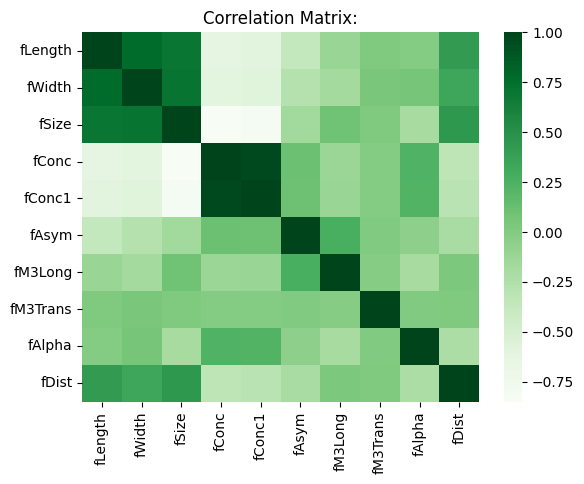

In [13]:
# Use the `.corr()` method on `data_matrix` to get the correlation matrix heatmap
correlation_matrix = data_matrix.corr()

ax = plt.axes()
sns.heatmap(correlation_matrix, cmap='Greens', ax=ax)
ax.set_title('Correlation Matrix:')
plt.show()

### Perform Eigendecomposition

Used to find the eigenvectors and eigenvalues of the covariance matrix of the data.

Eigenvectors represent the principal directions (or principal components) of the data, while eigenvalues indicate variability along these directions.

In [20]:
# Perform eigendecomposition using `np.linalg.eig` 
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

print(f'Eigenvalues length: {eigenvalues.size} \nOriginal Number of Features: {data_matrix.shape[1]}')

# Order the eigenvalues by ordering the indices of the eigenvalues using `argsort`, and use [::-1] to order them from greatest to smallest
indices = eigenvalues.argsort()[::-1]  
eigenvalues = eigenvalues[indices]
eigenvectors = eigenvectors[:, indices]

print(eigenvalues.shape, eigenvectors.shape)

print(eigenvalues)

Eigenvalues length: 10 
Original Number of Features: 10
(10,) (10, 10)
[4.2239909  1.5751879  1.01180532 0.9940127  0.74201939 0.65008647
 0.4075386  0.22036243 0.15475338 0.02024291]


### Find the variance/information percentages for each eigenvalue

Find the percentages of information for each eigenvector, which is generated by the proportion of its eigenvalues to the sum of all eigenvalues

In [22]:
information_proportions = eigenvalues / eigenvalues.sum()
information_percents = information_proportions * 100

print(information_proportions)
print(information_percents)

[0.42239909 0.15751879 0.10118053 0.09940127 0.07420194 0.06500865
 0.04075386 0.02203624 0.01547534 0.00202429]
[42.23990899 15.75187902 10.1180532   9.94012697  7.42019394  6.50086467
  4.07538598  2.20362427  1.54753381  0.20242914]


### Visualize principal axes vs information proportions

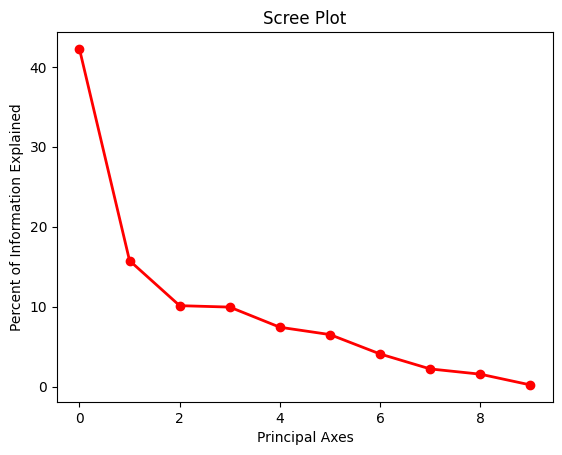

In [24]:
plt.figure()
plt.plot(information_percents, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Axes')
plt.ylabel('Percent of Information Explained')
plt.show()

### Find the cumulative variance/information percentages for each eigenvalue

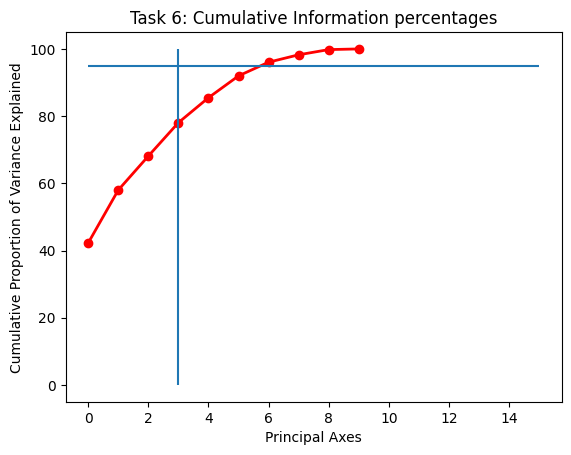

In [26]:
cumulative_information_percents = np.cumsum(information_percents)

# Plot the cumulative percentages array
plt.figure()
plt.plot(cumulative_information_percents, 'ro-', linewidth=2)

# Also plot a horizontal line indicating the 95% mark, and a vertical line for the third principal axis
plt.hlines(y=95, xmin=0, xmax=15)
plt.vlines(x=3, ymin=0, ymax=100)
plt.title('Task 6: Cumulative Information percentages')
plt.xlabel('Principal Axes')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.show()